In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


# Preprocessing on Dataset

##### Importing the dataset:
The dataset consists of data regarding the generation of solar power and weather sensor data of two solar power plants in India.



In [2]:
plant1_generation_df = pd.read_csv('Dataset\PLANT1_DATASET\Plant_1_Generation_Data.csv')
plant2_generation_df = pd.read_csv('Dataset\PLANT2_DATASET\Plant_2_Generation_Data.csv')
plant1_weather_df = pd.read_csv('Dataset\PLANT1_DATASET\Plant_1_Weather_Sensor_Data.csv')
plant2_weather_df = pd.read_csv('Dataset\PLANT2_DATASET\Plant_2_Weather_Sensor_Data.csv')

The original pairs of files initially have incompatible formats for the 'DATE_TIME' column. In order to have a joint dataframe for a particular power plant we make the following changes:

In [3]:
plant2_weather_df.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
203   2020-05-17 03:00:00   4136001  iq8k7ZNt4Mwm3w0            24.180007   
2621  2020-06-11 08:30:00   4136001  iq8k7ZNt4Mwm3w0            24.360200   
2606  2020-06-11 04:45:00   4136001  iq8k7ZNt4Mwm3w0            24.256151   
1896  2020-06-03 19:15:00   4136001  iq8k7ZNt4Mwm3w0            25.531681   
206   2020-05-17 03:45:00   4136001  iq8k7ZNt4Mwm3w0            24.318871   

      MODULE_TEMPERATURE  IRRADIATION  
203            22.021513     0.000000  
2621           25.258222     0.144233  
2606           23.536827     0.000000  
1896           24.413450     0.000000  
206            22.570318     0.000000

In [4]:
plant1_weather_df['DATE_TIME'] = pd.to_datetime(plant1_weather_df['DATE_TIME'])
plant1_weather_df['DATE_TIME']= plant1_weather_df['DATE_TIME'].dt.strftime('%d-%m-%Y %H:%M')

In [5]:
plant1_dataset = pd.merge( plant1_generation_df, plant1_weather_df, on = 'DATE_TIME' )
plant2_dataset = pd.merge( plant2_generation_df, plant2_weather_df, on = 'DATE_TIME' )

In [6]:
plant2_dataset['DATE_TIME'] = pd.to_datetime(plant2_dataset['DATE_TIME'])
plant2_dataset['DATE_TIME'] = plant2_dataset['DATE_TIME'].dt.strftime('%d-%m-%Y %H:%M')

In [7]:
print(plant1_dataset.head())

          DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
0  15-05-2020 00:00     4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00     4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00     4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00     4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00     4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
0          0.0    6259559.0     4135001  HmiyD2TTLFNqkNe            25.184316   
1          0.0    6183645.0     4135001  HmiyD2TTLFNqkNe            25.184316   
2          0.0    6987759.0     4135001  HmiyD2TTLFNqkNe            25.184316   
3          0.0    7602960.0     4135001  HmiyD2TTLFNqkNe            25.184316   
4          0.0    7158964.0     4135001  HmiyD2TTLFNqkNe            25.184316   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1     

In [8]:
plant1_dataset.sample(5)

DATE_TIME  PLANT_ID_x     SOURCE_KEY_x     DC_POWER    AC_POWER  \
4565   17-05-2020 07:30     4135001  uHbuxQJl8lW7ozc  2828.142857  277.671429   
37192  02-06-2020 22:30     4135001  iCRJl6heRkivqQ3     0.000000    0.000000   
24577  27-05-2020 13:30     4135001  uHbuxQJl8lW7ozc  3956.500000  388.750000   
11941  21-05-2020 09:30     4135001  ih0vzX44oOqAx2f  9623.000000  941.085714   
41007  04-06-2020 18:00     4135001  zVJPv84UY57bAof   929.375000   90.250000   

       DAILY_YIELD  TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
4565    156.285714  7051495.286     4135001  HmiyD2TTLFNqkNe   
37192  7465.000000  7317813.000     4135001  HmiyD2TTLFNqkNe   
24577  4744.500000  7133282.500     4135001  HmiyD2TTLFNqkNe   
11941  1388.714286  6227329.714     4135001  HmiyD2TTLFNqkNe   
41007  8201.750000  7271254.750     4135001  HmiyD2TTLFNqkNe   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
4565             23.908458           27.499170     0.221922  
37192            23.077539           21.056103     0.000000  
24577            32.206553           42.755688     0.299481  
11941            27.489748           49.733946     0.732597  
41007            26.473751           28.179812     0.070357

In [9]:
print(plant2_dataset.head())

          DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
0  15-05-2020 00:00     4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  15-05-2020 00:00     4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  15-05-2020 00:00     4136001  9kRcWv60rDACzjR       0.0       0.0   
3  15-05-2020 00:00     4136001  Et9kgGMDl729KT4       0.0       0.0   
4  15-05-2020 00:00     4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
0  9425.000000  2.429011e+06     4136001  iq8k7ZNt4Mwm3w0   
1     0.000000  1.215279e+09     4136001  iq8k7ZNt4Mwm3w0   
2  3075.333333  2.247720e+09     4136001  iq8k7ZNt4Mwm3w0   
3   269.933333  1.704250e+06     4136001  iq8k7ZNt4Mwm3w0   
4  3177.000000  1.994153e+07     4136001  iq8k7ZNt4Mwm3w0   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764    

In [10]:
plant2_dataset.sample(5)

DATE_TIME  PLANT_ID_x     SOURCE_KEY_x    DC_POWER    AC_POWER  \
41626  05-06-2020 15:30     4136001  xMbIugepa2P7lBB  516.200000  506.157143   
44977  07-06-2020 05:45     4136001  LYwnQax7tkwH5Cb    0.000000    0.000000   
36015  02-06-2020 23:30     4136001  vOuJvMaM2sgwLmb    0.000000    0.000000   
35004  02-06-2020 12:00     4136001  xMbIugepa2P7lBB  948.942857  926.850000   
43338  06-06-2020 11:00     4136001  oZZkBaNadn6DNKz    0.000000    0.000000   

       DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
41626  6779.785714  1.068219e+08     4136001  iq8k7ZNt4Mwm3w0   
44977     0.000000  1.795069e+09     4136001  iq8k7ZNt4Mwm3w0   
36015  3796.000000  2.341270e+06     4136001  iq8k7ZNt4Mwm3w0   
35004  3177.928571  1.067983e+08     4136001  iq8k7ZNt4Mwm3w0   
43338   909.000000  1.708225e+09     4136001  iq8k7ZNt4Mwm3w0   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
41626            29.233108           36.759183     0.337509  
44977            23.304093           22.277757     0.002005  
36015            24.987076           24.487060     0.000000  
35004            31.112017           55.954420     0.762286  
43338            31.370819           51.421104     0.898635

In [11]:
print(f"Shape of Plant-1 Dataset = { plant1_dataset.shape }")
print(f"Shape of Plant-2 Dataset = { plant2_dataset.shape }")

Shape of Plant-1 Dataset = (68774, 12)
Shape of Plant-2 Dataset = (67698, 12)


Each Dataset therefore has 12 Attributes at present. We perform Exploratory data analysis to figure out the importance and correlation between the attributes.

In [12]:
attributes = plant1_dataset.columns.to_list()
for column in attributes:
  print(column)

DATE_TIME
PLANT_ID_x
SOURCE_KEY_x
DC_POWER
AC_POWER
DAILY_YIELD
TOTAL_YIELD
PLANT_ID_y
SOURCE_KEY_y
AMBIENT_TEMPERATURE
MODULE_TEMPERATURE
IRRADIATION


### Checking For Null Values in the Dataset

In [13]:
plant1_dataset.info()
plant1_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            68774 non-null  object 
 1   PLANT_ID_x           68774 non-null  int64  
 2   SOURCE_KEY_x         68774 non-null  object 
 3   DC_POWER             68774 non-null  float64
 4   AC_POWER             68774 non-null  float64
 5   DAILY_YIELD          68774 non-null  float64
 6   TOTAL_YIELD          68774 non-null  float64
 7   PLANT_ID_y           68774 non-null  int64  
 8   SOURCE_KEY_y         68774 non-null  object 
 9   AMBIENT_TEMPERATURE  68774 non-null  float64
 10  MODULE_TEMPERATURE   68774 non-null  float64
 11  IRRADIATION          68774 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 6.3+ MB


DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [14]:
plant2_dataset.info()
plant2_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            67698 non-null  object 
 1   PLANT_ID_x           67698 non-null  int64  
 2   SOURCE_KEY_x         67698 non-null  object 
 3   DC_POWER             67698 non-null  float64
 4   AC_POWER             67698 non-null  float64
 5   DAILY_YIELD          67698 non-null  float64
 6   TOTAL_YIELD          67698 non-null  float64
 7   PLANT_ID_y           67698 non-null  int64  
 8   SOURCE_KEY_y         67698 non-null  object 
 9   AMBIENT_TEMPERATURE  67698 non-null  float64
 10  MODULE_TEMPERATURE   67698 non-null  float64
 11  IRRADIATION          67698 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 6.2+ MB


DATE_TIME              0
PLANT_ID_x             0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
PLANT_ID_y             0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

Note that there are no NAN or null values in the dataset.

In [15]:
PLANT_ID = np.concatenate( ( np.unique( plant1_dataset['PLANT_ID_x'] , return_counts = False ), np.unique( plant2_dataset['PLANT_ID_x'] , return_counts = False )))
print(f"PLANT_ID present in DATASET = { PLANT_ID }")

PLANT_ID present in DATASET = [4135001 4136001]


We combine the data obtained from both the plants and analyse the combined dataset.

In [16]:
COMBINED_DATASET = pd.concat([plant1_dataset, plant2_dataset], ignore_index=True)
DATASET = COMBINED_DATASET.sample( frac = 1, random_state = 57 ).reset_index( drop = True ) #Shuffling the combined rows to avoid any structural bias

print(f"Five random Samples with PLANT_ID = {PLANT_ID[0]}:\n")
print( DATASET[ DATASET['PLANT_ID_x'] == PLANT_ID[0] ].sample(5) )

print(f"\nFive random Samples with PLANT_ID = {PLANT_ID[1]}:\n")
print( DATASET[ DATASET['PLANT_ID_x'] == PLANT_ID[1] ].sample(5) )


Five random Samples with PLANT_ID = 4135001:

               DATE_TIME  PLANT_ID_x     SOURCE_KEY_x     DC_POWER  \
63982   16-06-2020 04:45     4135001  sjndEbLyjtCKgGv     0.000000   
104228  29-05-2020 09:00     4135001  uHbuxQJl8lW7ozc  6852.142857   
53468   23-05-2020 10:00     4135001  wCURE6d3bPkepu2  8821.857143   
29756   16-06-2020 13:15     4135001  pkci93gMrogZuBj  7691.428571   
23337   01-06-2020 23:30     4135001  ZnxXDlPa8U1GXgE     0.000000   

          AC_POWER  DAILY_YIELD  TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
63982     0.000000     0.000000  7249539.000     4135001  HmiyD2TTLFNqkNe   
104228  670.885714   803.428571  7144435.429     4135001  HmiyD2TTLFNqkNe   
53468   863.042857  1884.285714  6841109.286     4135001  HmiyD2TTLFNqkNe   
29756   752.857143  4081.000000  7407298.000     4135001  HmiyD2TTLFNqkNe   
23337     0.000000  5918.000000  6655443.000     4135001  HmiyD2TTLFNqkNe   

        AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
63982  

Note that **SOURCE_KEY** in weather sensor data represents the identifier of the sensor which has recorded the data. This is unique for both the plants and is hence irrelevant in our study for **SOLAR POWER PREDICTION**.
Similary the **PLANT_ID** column in the weather sensor data is also a repeated attribute.

Reorganizing the dataset for better understanding and analysis.

In [17]:
repeatitive_columns_to_drop = ['PLANT_ID_y', 'SOURCE_KEY_y']
DATASET.drop( columns = repeatitive_columns_to_drop, inplace = True )
updated_column_names = { 'PLANT_ID_x' : 'PLANT_ID', 'SOURCE_KEY_x' : 'INVERTER_ID' }
DATASET.rename( columns = updated_column_names, inplace = True )

# Splitting the DATE_TIME column into DATE and TIME columns
DATASET['DATE'] = DATASET['DATE_TIME'].str.split(' ').str[0]
DATASET['TIME'] = DATASET['DATE_TIME'].str.split(' ').str[1]
DATASET = DATASET.drop('DATE_TIME', axis=1)

columns = ['DATE', 'TIME'] + [col for col in DATASET.columns if col not in ['DATE', 'TIME']]
DATASET = DATASET[columns]


DATASET.sample(5)


DATE   TIME  PLANT_ID      INVERTER_ID     DC_POWER  \
38590   08-06-2020  19:30   4135001  ZnxXDlPa8U1GXgE      0.00000   
43180   21-05-2020  15:00   4135001  ih0vzX44oOqAx2f  10792.85714   
93684   31-05-2020  06:00   4136001  LlT2YUhhzqhg5Sw     19.56000   
113308  28-05-2020  21:45   4135001  sjndEbLyjtCKgGv      0.00000   
50726   14-06-2020  05:15   4135001  McdE0feGgRqW7Ca      0.00000   

           AC_POWER  DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  \
38590      0.000000  8435.000000  6.709698e+06            25.331020   
43180   1054.871429  6613.571429  6.232555e+06            32.333368   
93684     18.880000     1.466667  2.827058e+08            26.293775   
113308     0.000000  8338.000000  7.120903e+06            20.613988   
50726      0.000000     0.000000  7.381923e+06            22.439388   

        MODULE_TEMPERATURE  IRRADIATION  
38590            22.709330     0.000000  
43180            52.991542     0.740921  
93684            25.354829     0.015425  
113308           19.553317     0.000000  
50726            21.318453     0.000000

#### Converting Categorical Data to Numerical Data

In [18]:
label_encoder = LabelEncoder()
DATASET['INVERTER_ID']  = label_encoder.fit_transform( DATASET['INVERTER_ID'] )
DATASET['PLANT_ID']     = label_encoder.fit_transform( DATASET['PLANT_ID'] )

In [19]:
DATASET.sample(5)

DATE   TIME  PLANT_ID  INVERTER_ID     DC_POWER    AC_POWER  \
45388   09-06-2020  13:15         1           34     0.000000    0.000000   
81320   17-06-2020  18:00         0           21   603.142857   58.385714   
58231   26-05-2020  14:00         0           22  8776.571429  857.428571   
101706  20-05-2020  21:45         0           27     0.000000    0.000000   
113865  23-05-2020  00:00         0           23     0.000000    0.000000   

        DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
45388   1792.000000  1.210931e+08            33.202897           46.486757   
81320   5869.857143  7.425426e+06            24.130349           25.080925   
58231   6129.714286  6.610796e+06            33.488021           59.663859   
101706  8664.000000  6.225941e+06            24.499196           21.570330   
113865     0.000000  7.153713e+06            21.719189           20.471440   

        IRRADIATION  
45388      0.584120  
81320      0.041940  
58231      0.718815  
101706     0.000000  
113865     0.000000

#### Splitting the dataset into train set and test set

In [20]:
DATASET = DATASET.sample(frac=1).reset_index(drop=True) #shuffle dataset
TRAIN_PERCENTAGE = 0.75
VAL_PERCENTAGE = 0.15
TEST_PERCENTAGE = 0.1


NUMBER_OF_TRAINING_SAMPLES = int( TRAIN_PERCENTAGE * DATASET.shape[0] )
NUMBER_OF_VAL_SAMPLES = int( VAL_PERCENTAGE * DATASET.shape[0] )
NUMBER_OF_TEST_SAMPLES =  DATASET.shape[0] - NUMBER_OF_TRAINING_SAMPLES - NUMBER_OF_VAL_SAMPLES

TRAIN_SET = DATASET.iloc[ : NUMBER_OF_TRAINING_SAMPLES ]
VAL_SET   = DATASET.iloc[ NUMBER_OF_TRAINING_SAMPLES : NUMBER_OF_TRAINING_SAMPLES + NUMBER_OF_VAL_SAMPLES ]
TEST_SET  = DATASET.iloc[ NUMBER_OF_TRAINING_SAMPLES + NUMBER_OF_VAL_SAMPLES : ]

print(f"Shape of DATASET    = { DATASET.shape }")
print(f"Shape of Train Set  = { TRAIN_SET.shape }")
print(f"Shape of Validation Set = { VAL_SET.shape }")
print(f"Shape of Test Set   = { TEST_SET.shape }")


Shape of DATASET    = (136472, 11)
Shape of Train Set  = (102354, 11)
Shape of Validation Set = (20470, 11)
Shape of Test Set   = (13648, 11)


In [21]:
y_train = TRAIN_SET['AC_POWER']
x_train = TRAIN_SET.drop('AC_POWER', axis=1)
y_val = VAL_SET['AC_POWER']
x_val = VAL_SET.drop('AC_POWER', axis=1)
y_test = TEST_SET['AC_POWER']
x_test = TEST_SET.drop('AC_POWER', axis=1)

print(f"Shape of x_train = {x_train.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of x_val   = {x_val.shape}")
print(f"Shape of y_val   = {y_val.shape}")
print(f"Shape of x_test  = {x_test.shape}")
print(f"Shape of y_test  = {y_test.shape}")

Shape of x_train = (102354, 10)
Shape of y_train = (102354,)
Shape of x_val   = (20470, 10)
Shape of y_val   = (20470,)
Shape of x_test  = (13648, 10)
Shape of y_test  = (13648,)


In [22]:
x_train.sample(5)

DATE   TIME  PLANT_ID  INVERTER_ID    DC_POWER  DAILY_YIELD  \
100746  05-06-2020  08:00         1            6  289.566667   298.666667   
88954   05-06-2020  05:45         1           34    0.000000     0.000000   
101530  30-05-2020  22:15         0           33    0.000000  7364.000000   
81128   22-05-2020  23:00         0           43    0.000000     0.000000   
53350   15-06-2020  18:30         1           17   34.700000  2560.933333   

         TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
100746  2.247858e+09            25.384291           31.102874     0.216086  
88954   1.210795e+08            23.482279           22.693254     0.000947  
101530  7.230438e+06            23.247797           21.252519     0.000000  
81128   7.172294e+06            22.361055           20.863080     0.000000  
53350   1.412283e+09            26.216273           26.278047     0.023538

The dataset has been split into train and test set with a ratio of 4:1. The dataset at present has 10 dimensions, hence 10 features which need to be considered.

We analyse the dependency of the output of the solar power plants, that is **AC_POWER** with the rest of the dimensions by plotting the relationship between **AC_POWER** and other dimensions.

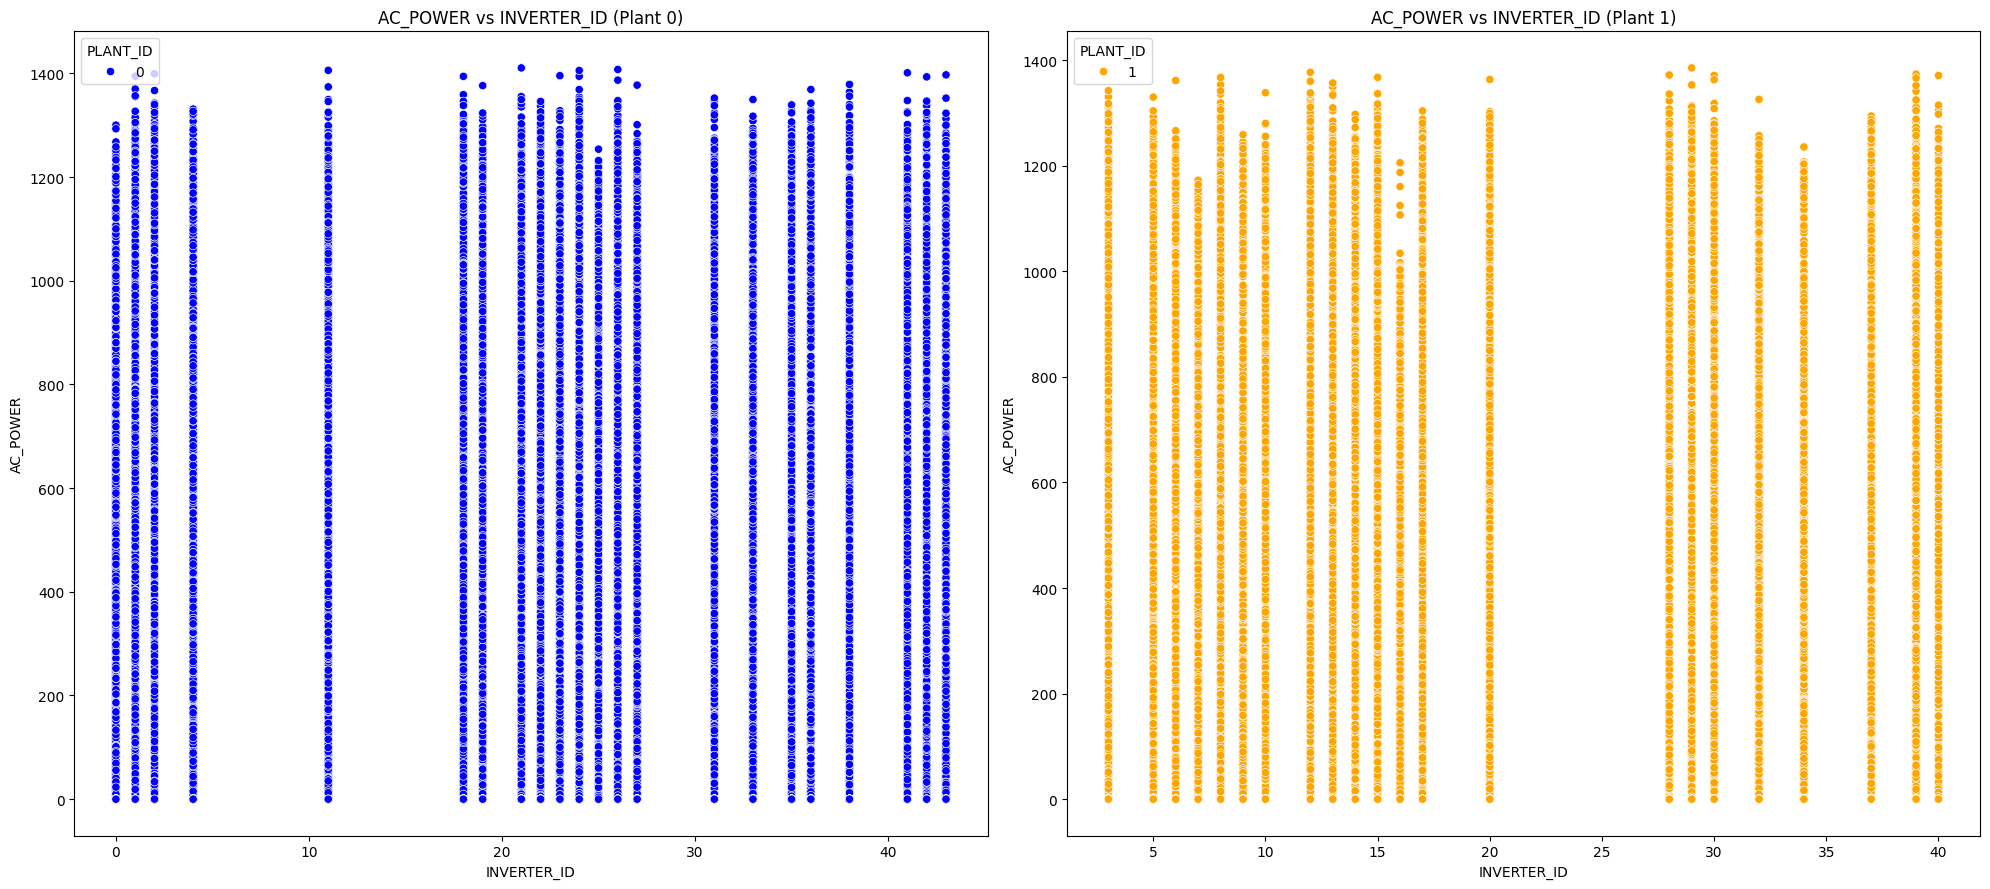

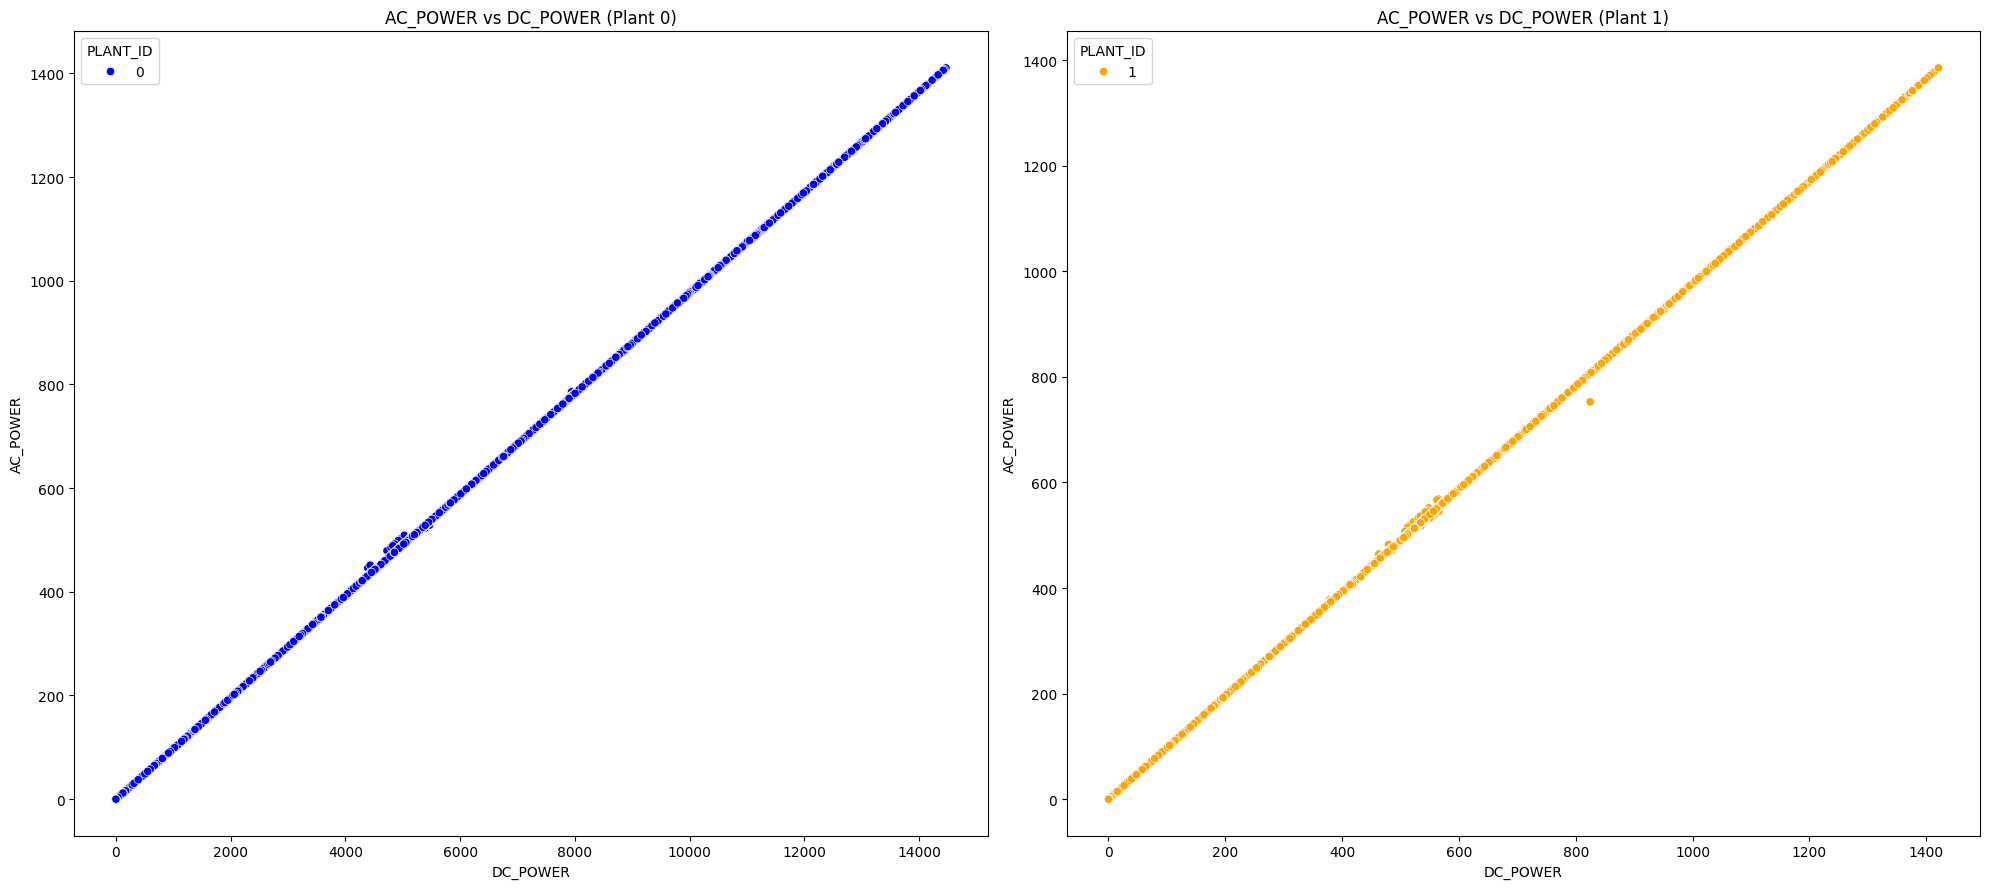

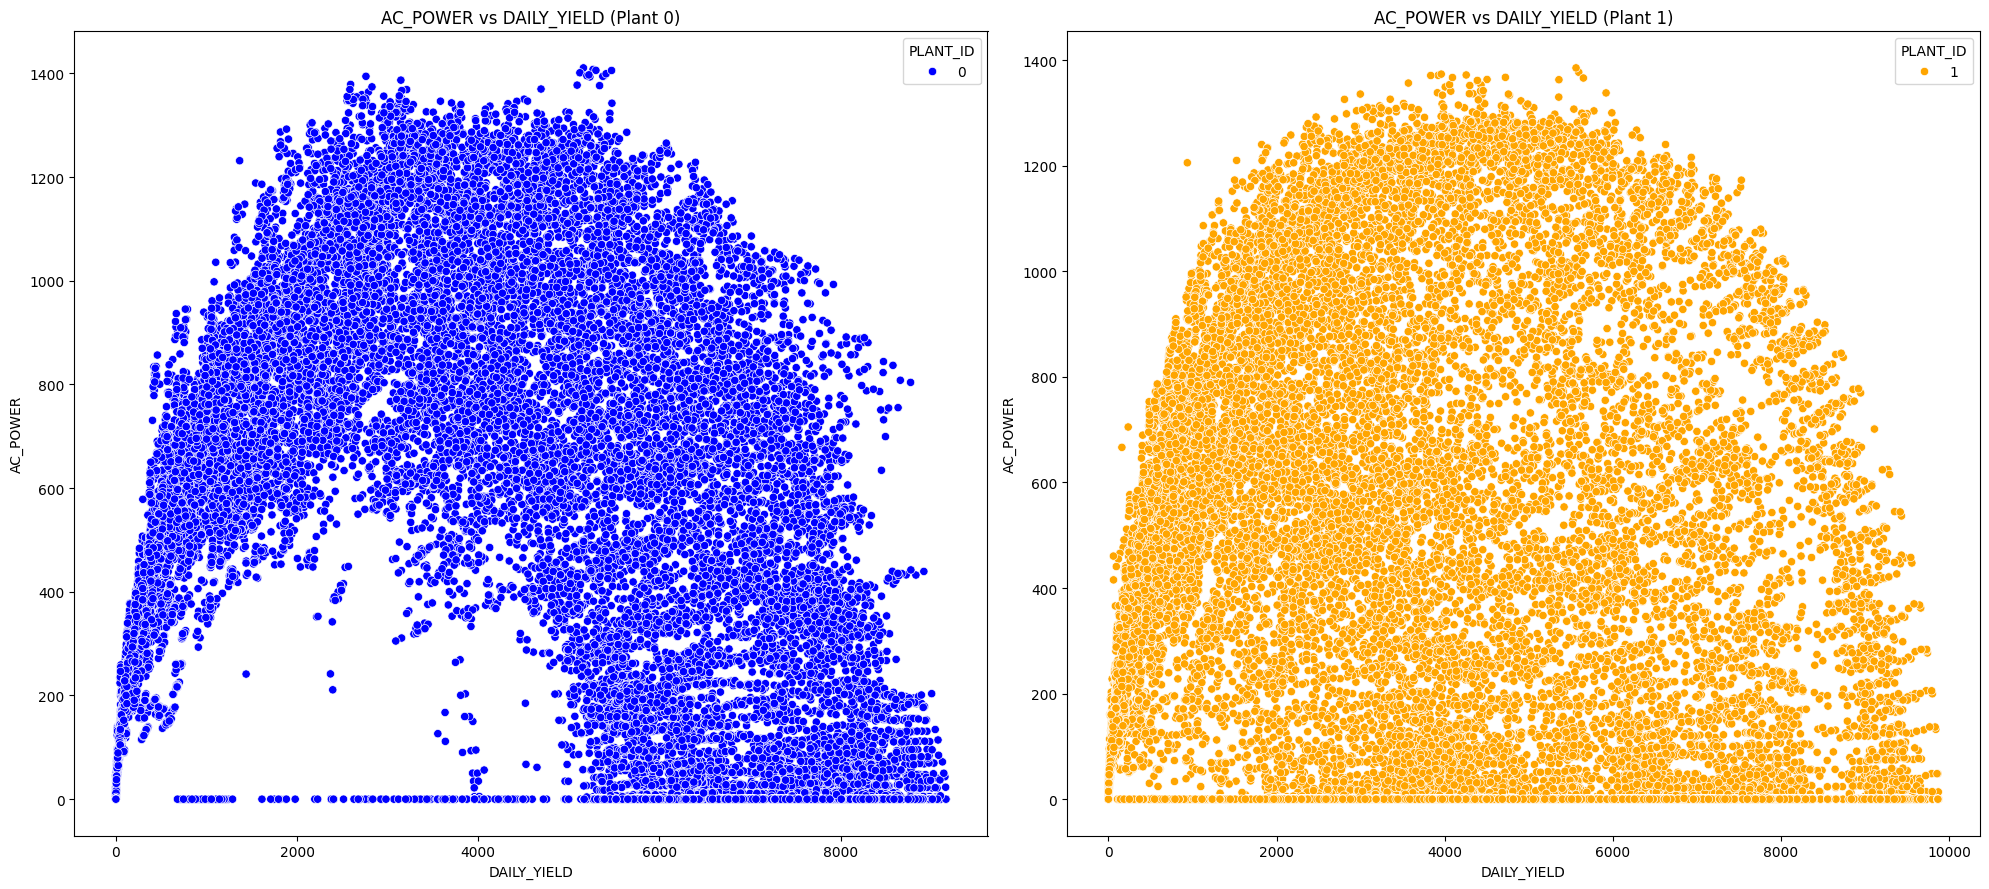

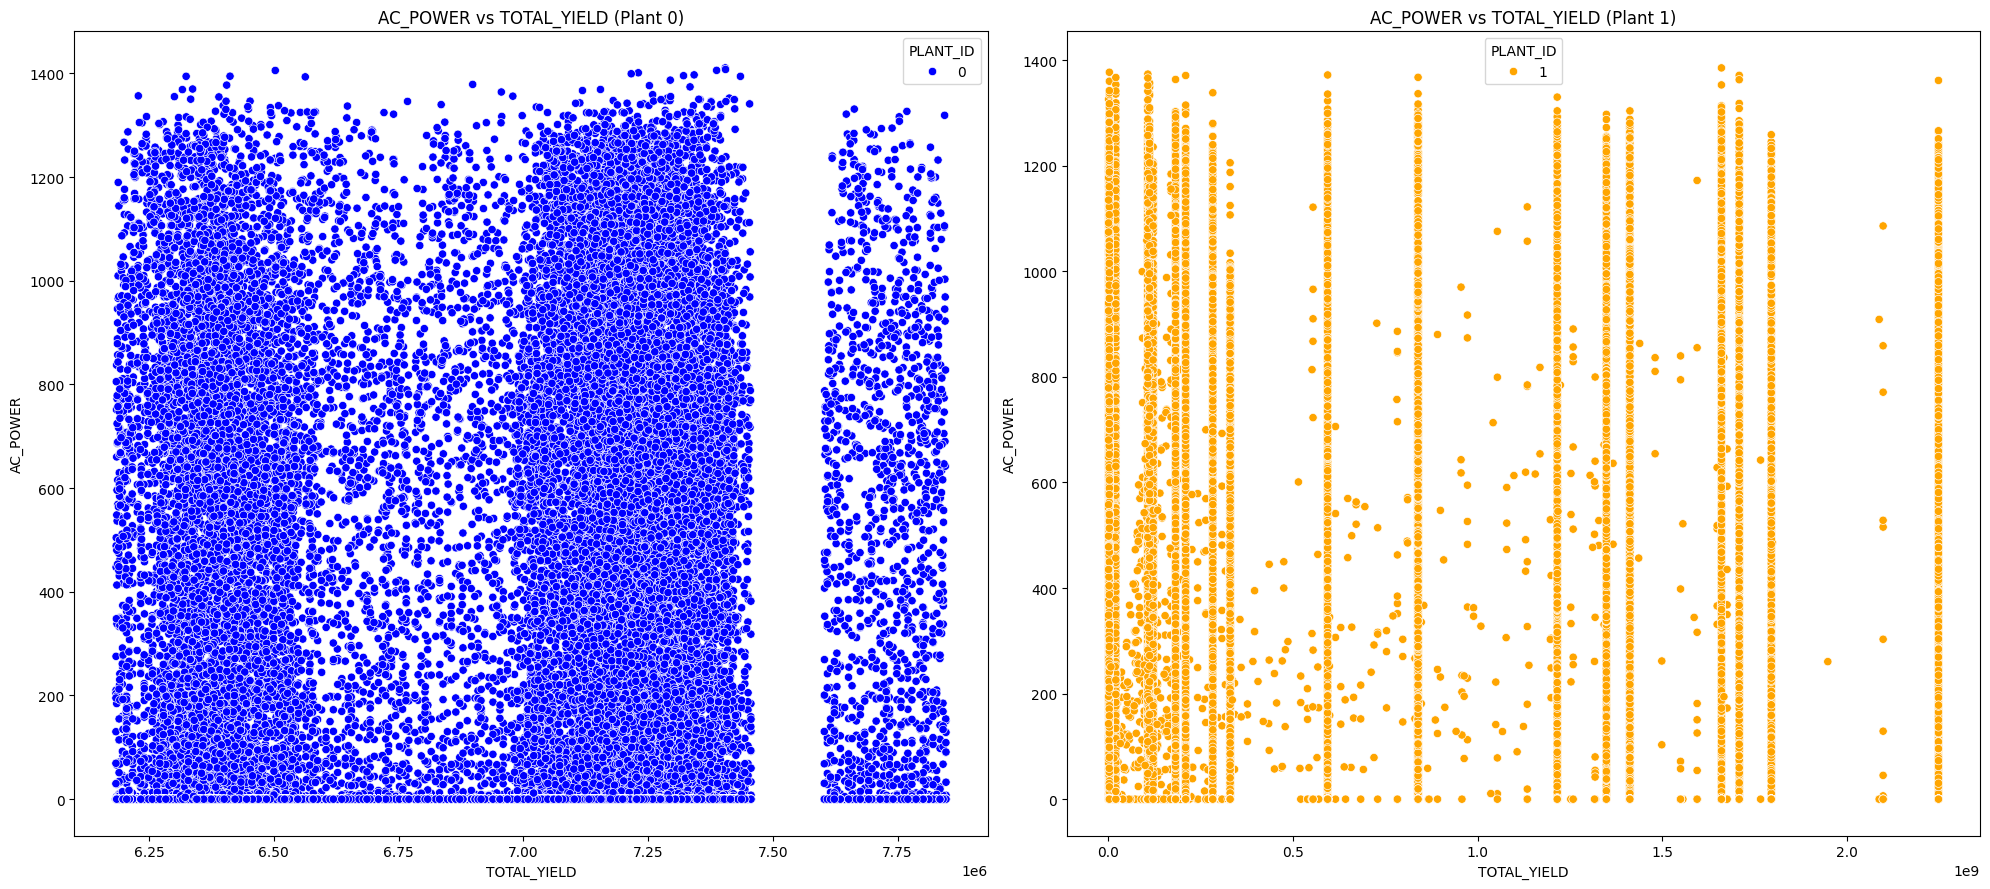

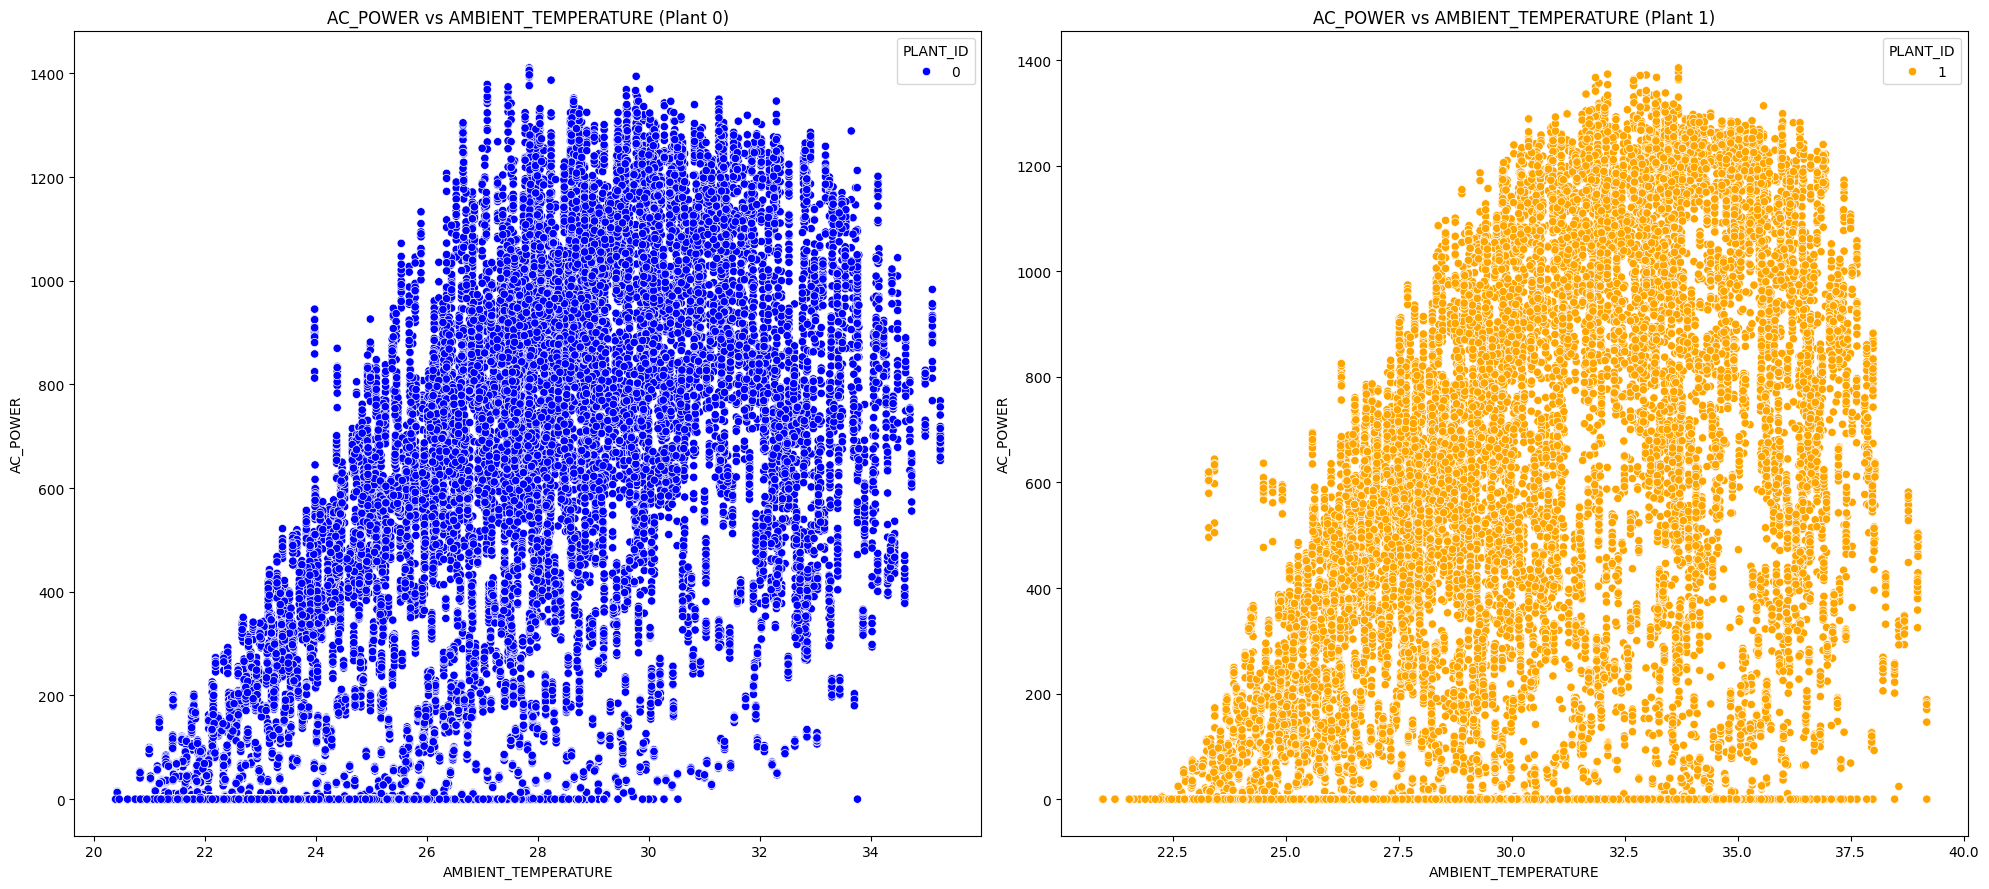

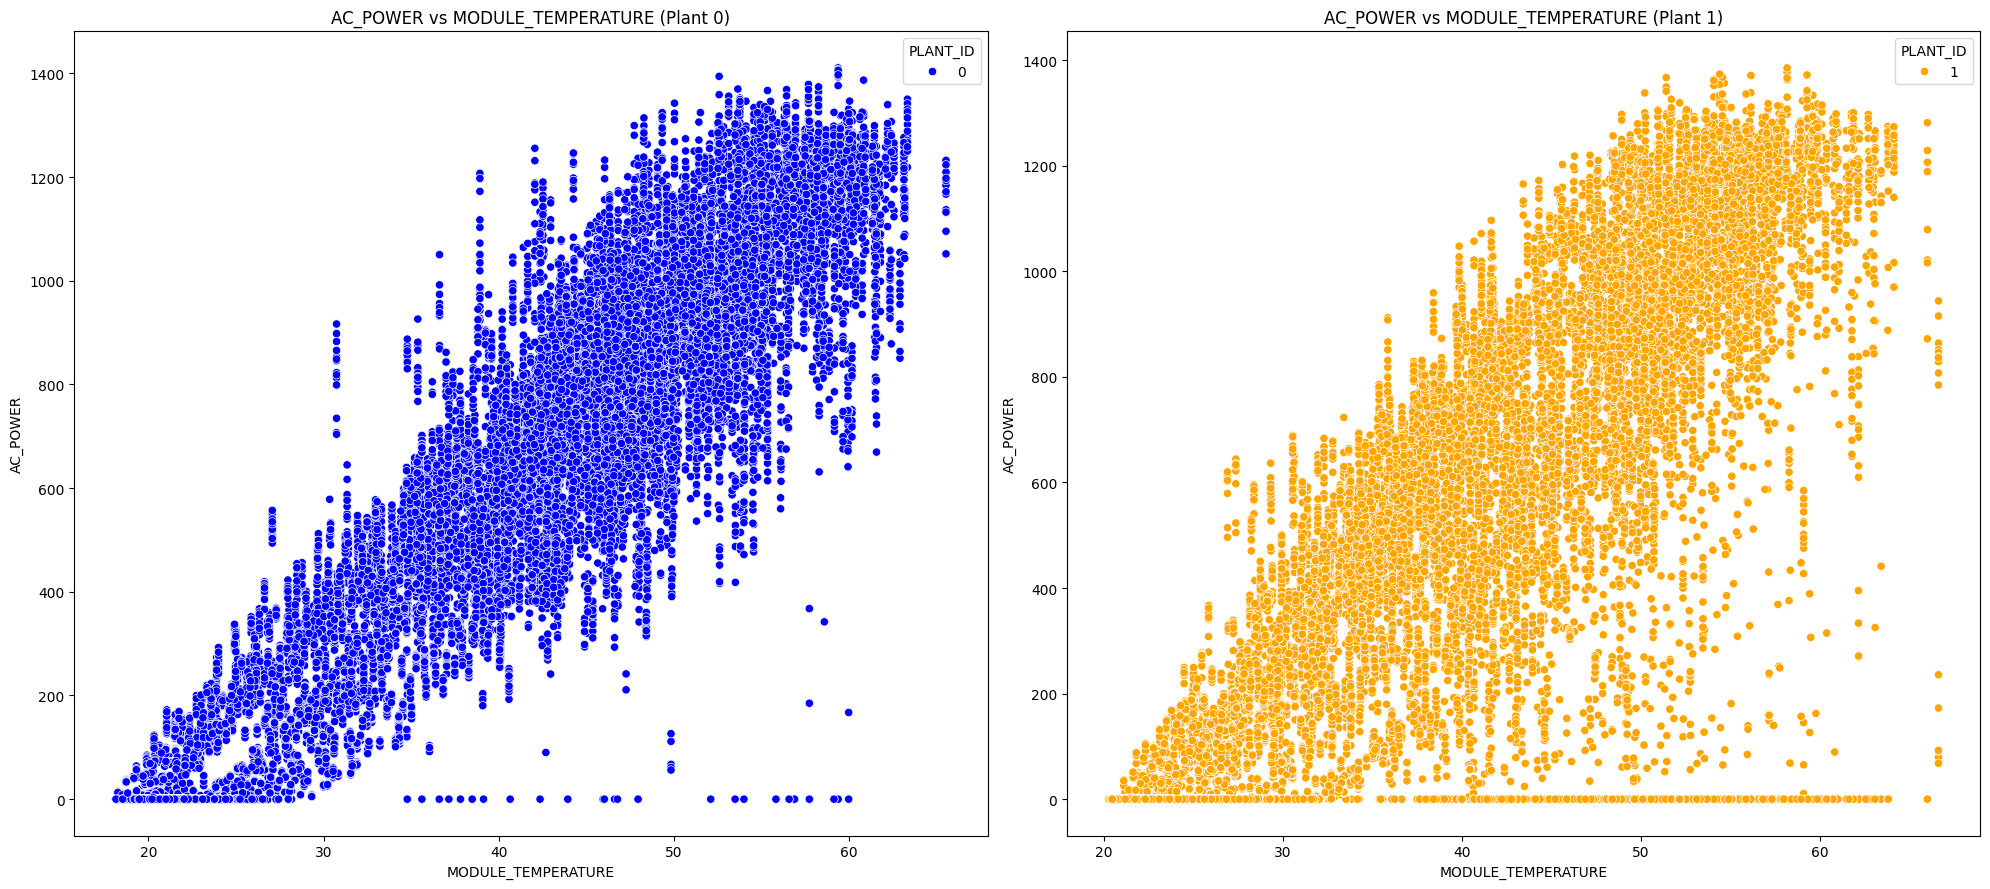

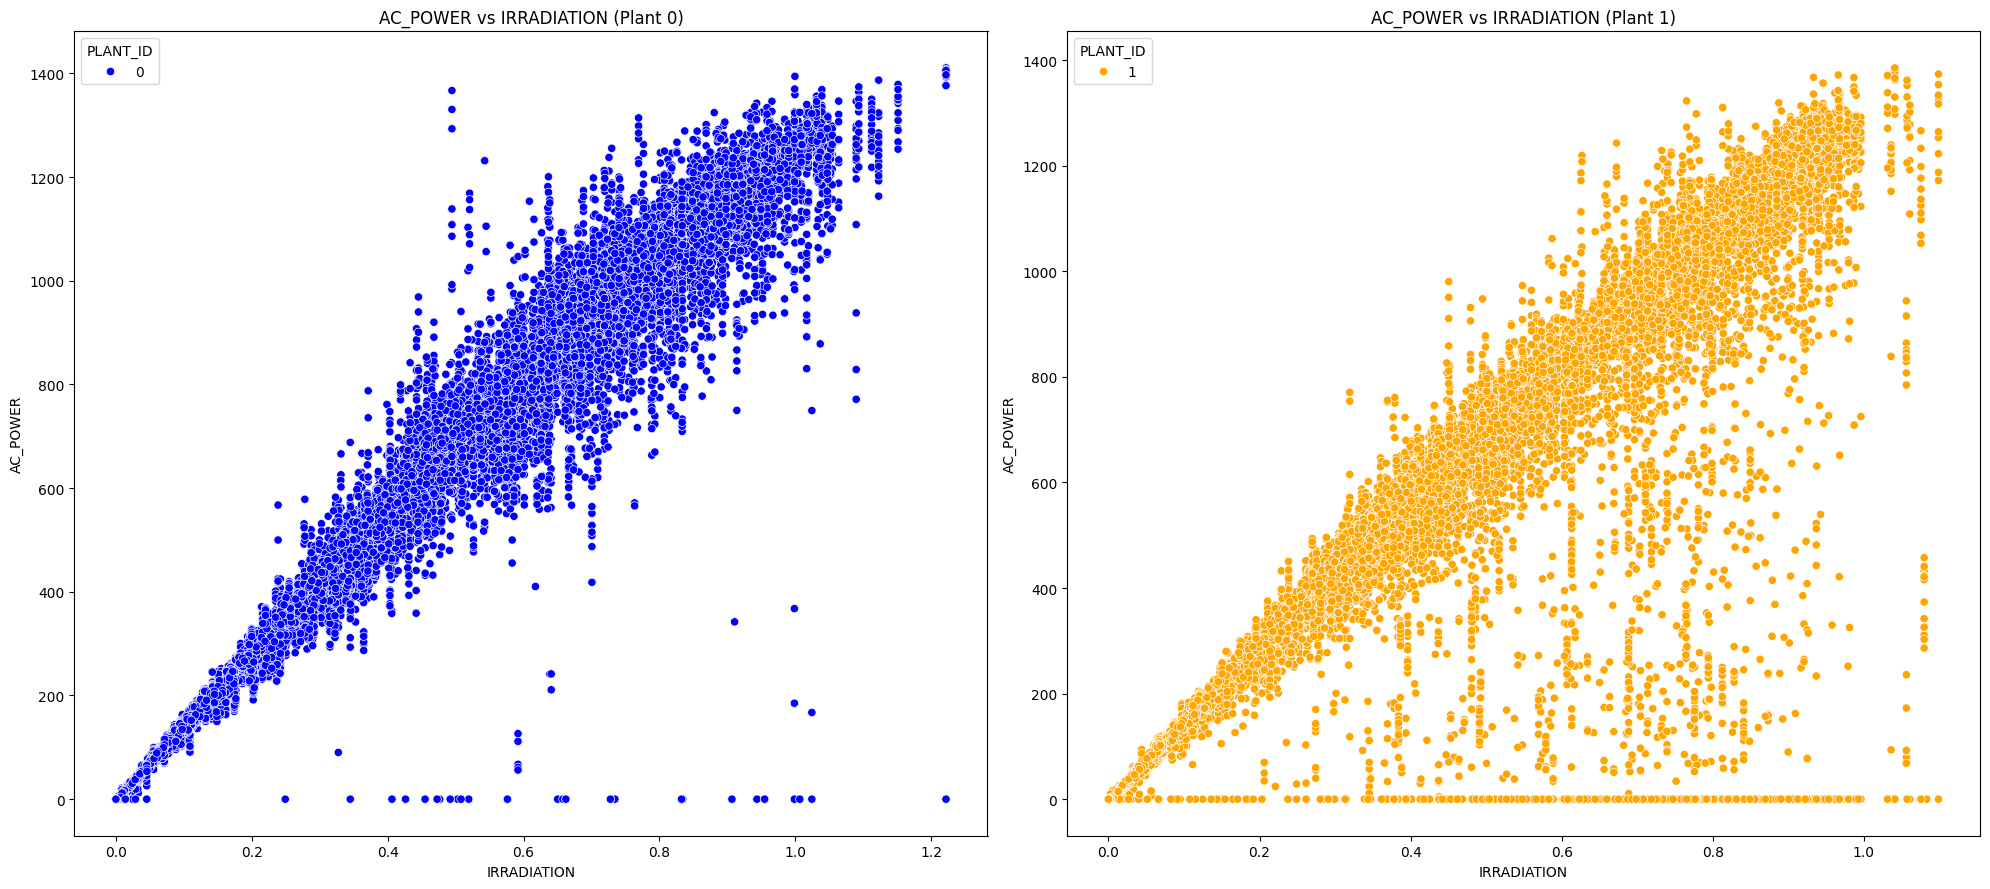

In [23]:
features = x_train.columns
irrelevant_features = ['DATE', 'TIME', 'PLANT_ID']
num_plants = len(x_train['PLANT_ID'].unique())

for feature in features:
    if feature in irrelevant_features:
        continue
    
    fig, axes = plt.subplots(1, num_plants, figsize=(10 * num_plants, 9))
    
    for i, (plant_id, xtrain) in enumerate(x_train.groupby('PLANT_ID')):
        sns.scatterplot( x = feature, y = y_train.loc[ xtrain.index ], hue = 'PLANT_ID', palette = { 0: 'blue', 1: 'orange' }, data = xtrain, ax = axes[i] )
        axes[i].set_title(f'AC_POWER vs {feature} (Plant {plant_id})')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('AC_POWER')
        axes[i].legend(title = 'PLANT_ID')
    
    plt.tight_layout()
    plt.show()

##### Analysis of Above Plots


**DC Power**: Strong positive correlation. Higher DC power generally translates to higher AC power output, assuming efficient inverter operation. While a linear relationship is a good starting point, other factors might influence the prediction accuracy.

**Irradiation**: Strong positive correlation. More sunlight received ( irradiation, that is W/m^2 ) leads to more DC power available for conversion to AC power. The points are scattered across the y = x line, highlighting the direct dependency between the two features. 

**Ambient Temperature**: This represent the relationship between the temperature at the plant at that time instant and the AC_POWER generated. There is a shift in the scatter towards the right, indicating that higher ambient temperature can decrease AC power output due to reduced efficiency.

**Module Temperature**: Similar to irradiation, the scatter aligns itself along the line passing through origin.
There is direct relationship between AC_POWER and MODULE_TEMPERATURE. Higher module temperature leads to higher AC power output.



<u>Challenges</u>

**Inverter ID**: This is a unique identifier for a specific inverter and doesn't directly measure current AC power output. Scatter Plot is hence insignificant.


**Daily** and **Total Yield**: While daily and total yield (energy produced) are related to AC power, the relationship is complex. Predicting AC power from yield alone is difficult because multiple AC power profiles can result in the same yield. Additional information, like sunlight exposure, is needed for better prediction. The plots are immensely scattered and hence the relationship is not direct and hence not significant.

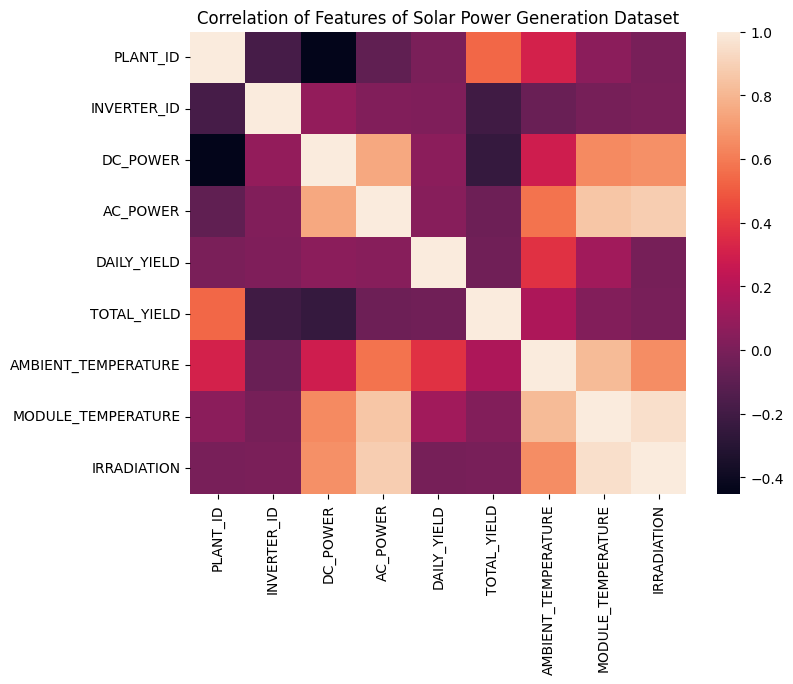


 Correlation of Features with AC_POWER: 

IRRADIATION            0.885606
MODULE_TEMPERATURE     0.853323
DC_POWER               0.749746
AMBIENT_TEMPERATURE    0.574027
DAILY_YIELD            0.047698
INVERTER_ID            0.021922
TOTAL_YIELD           -0.045721
PLANT_ID              -0.089263
Name: AC_POWER, dtype: float64


In [24]:
corrrealtion_matrix = TRAIN_SET.drop(columns = ['DATE','TIME']).corr()
plt.figure(figsize = (8,6))
sns.heatmap(corrrealtion_matrix )
plt.title("Correlation of Features of Solar Power Generation Dataset")
plt.show()
correlation_with_AC_POWER = corrrealtion_matrix['AC_POWER'].sort_values(ascending=False).drop('AC_POWER')
print(f"\n Correlation of Features with AC_POWER: \n")
print(correlation_with_AC_POWER)

#### Analysis of Correlation Heatmap
From the above plot, we can see the how AC_POWER relates to the other dimensions. We can see that the **AC_POWER** is highly correlated with the **IRRADIATION**, **DC_POWER**,  **AMBIENT_TEMPERATURE** and **MODULE_TEMPERATURE**. The correlation between **AC_POWER** and **DAILY_YEILD** and **TOTAL_YEILD** is also of mild significance. The correlation between **AC_POWER** and other dimensions is not significant, and hence these dimensions can be ignored for the prediction of **AC_POWER**.

In order to support our analysis, we implement the following two models for feature selection:
1. Lasso Regression  ( feature importance )

#### Lasso Regression Model with Cross Validation

Best Value of Lambda = 0.0001
Lasso Coefficients: 
[ 21.75926381   2.23550015 140.11746607   9.46246054   3.32277549
  42.13985279 -88.07961032 300.13115269]


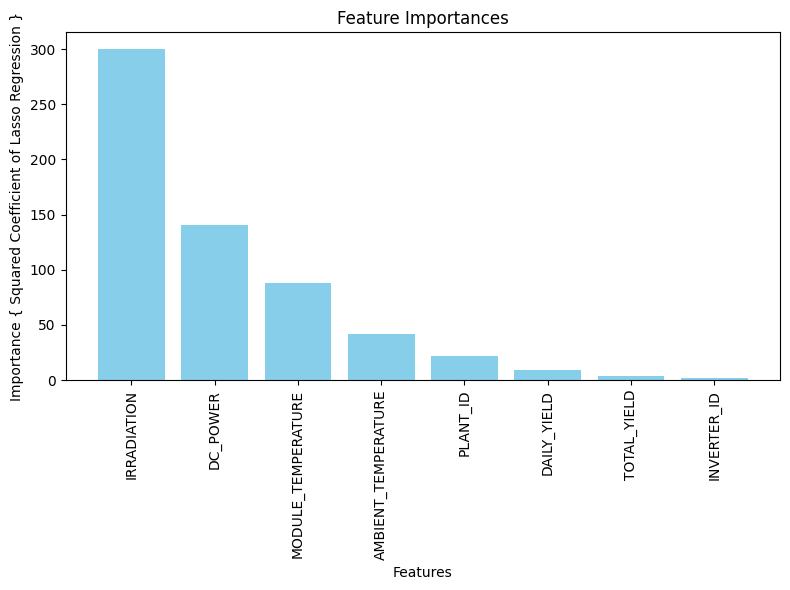

In [25]:
# Since Lasso Regression may assign unnecessary importance to features with larger/ wider scales. --> mean = 0 , var = 1
# It is important to scale the features before applying Lasso Regression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.drop(columns = ['DATE', 'TIME']))

model = Lasso()
param_grid = {'alpha' : np.array([10**i for i in [-6,-5,-4,-3,-2,-1]])} #parameters for GridSearchCV

# Note that we score based on negative mean squared error in order to minimize the error
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error') # 5-fold cross-validation
grid_search.fit(x_train_scaled, y_train)
optimal_lambda_value = grid_search.best_params_['alpha']

print(f"Best Value of Lambda = {optimal_lambda_value}")

lasso_coefficients = grid_search.best_estimator_.coef_
print(f"Lasso Coefficients: \n{lasso_coefficients}")

feature_importance = np.abs(lasso_coefficients)

features = x_train.drop(columns = ['DATE', 'TIME' ]).columns
indices = np.argsort(feature_importance)[::-1] #descending order of importance

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), feature_importance[indices], align = "center", color = 'skyblue')
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance { Squared Coefficient of Lasso Regression }")
plt.tight_layout()
plt.show()


We note that Lasso Regression **shrinks** the coefficients of the less important features to **zero**. Hence, the features with non-zero coefficients are the most important features for the prediction of **AC_POWER**.

In [26]:
# Drop INVERTER_ID, PLANT_ID, DAILY_YEILD, TOTAL_YEILD columns
columns_to_drop = ['INVERTER_ID', 'PLANT_ID', 'DAILY_YIELD', 'TOTAL_YIELD', 'DATE', 'TIME']
reduced_x_train = x_train.drop(columns = columns_to_drop)
reduced_x_test = x_test.drop(columns = columns_to_drop)
reduced_x_val = x_val.drop(columns = columns_to_drop)

In [27]:
# write these reduced datasets to csv files
reduced_x_train.to_csv(os.path.join('Processed_datasets', 'reduced_x_train.csv'), index=False)
reduced_x_test.to_csv(os.path.join('Processed_datasets', 'reduced_x_test.csv'), index=False)
reduced_x_val.to_csv(os.path.join('Processed_datasets', 'reduced_x_val.csv'), index=False)
y_train.to_csv(os.path.join('Processed_datasets', 'y_train.csv'), index=False)
y_val.to_csv(os.path.join('Processed_datasets', 'y_val.csv'), index=False)
y_test.to_csv(os.path.join('Processed_datasets', 'y_test.csv'), index=False)